<a href="https://colab.research.google.com/github/sharfe0188/Basic-Model-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

In [ ]:
# prompt: get data from yahoo of stock is goog from starting to  ending of dates

data = yf.download("GOOG", start="2022-01-01", end="2023-05-01")


[*********************100%***********************]  1 of 1 completed


In [ ]:
data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,144.475494,145.550003,143.502502,145.074493,144.909592,25214000
2022-01-04,145.550507,146.610001,143.816147,144.416504,144.252350,22928000
2022-01-05,144.181000,144.298004,137.523499,137.653503,137.497040,49642000
2022-01-06,137.497498,139.686005,136.763504,137.550995,137.394653,29050000
2022-01-07,137.904999,138.254745,135.789001,137.004501,136.848770,19408000
...,...,...,...,...,...,...
2023-04-24,106.050003,107.320000,105.360001,106.779999,106.658623,21410900
2023-04-25,106.610001,107.440002,104.559998,104.610001,104.491096,31408100
2023-04-26,105.559998,107.019997,103.269997,104.449997,104.331276,37068200


In [ ]:
# prompt: give reset index for it

data_reset = data.reset_index()
data_reset


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,144.475494,145.550003,143.502502,145.074493,144.909592,25214000
1,2022-01-04,145.550507,146.610001,143.816147,144.416504,144.252350,22928000
2,2022-01-05,144.181000,144.298004,137.523499,137.653503,137.497040,49642000
3,2022-01-06,137.497498,139.686005,136.763504,137.550995,137.394653,29050000
4,2022-01-07,137.904999,138.254745,135.789001,137.004501,136.848770,19408000
...,...,...,...,...,...,...,...
327,2023-04-24,106.050003,107.320000,105.360001,106.779999,106.658623,21410900
328,2023-04-25,106.610001,107.440002,104.559998,104.610001,104.491096,31408100
329,2023-04-26,105.559998,107.019997,103.269997,104.449997,104.331276,37068200
330,2023-04-27,105.230003,109.150002,104.419998,108.370003,108.246826,38235200


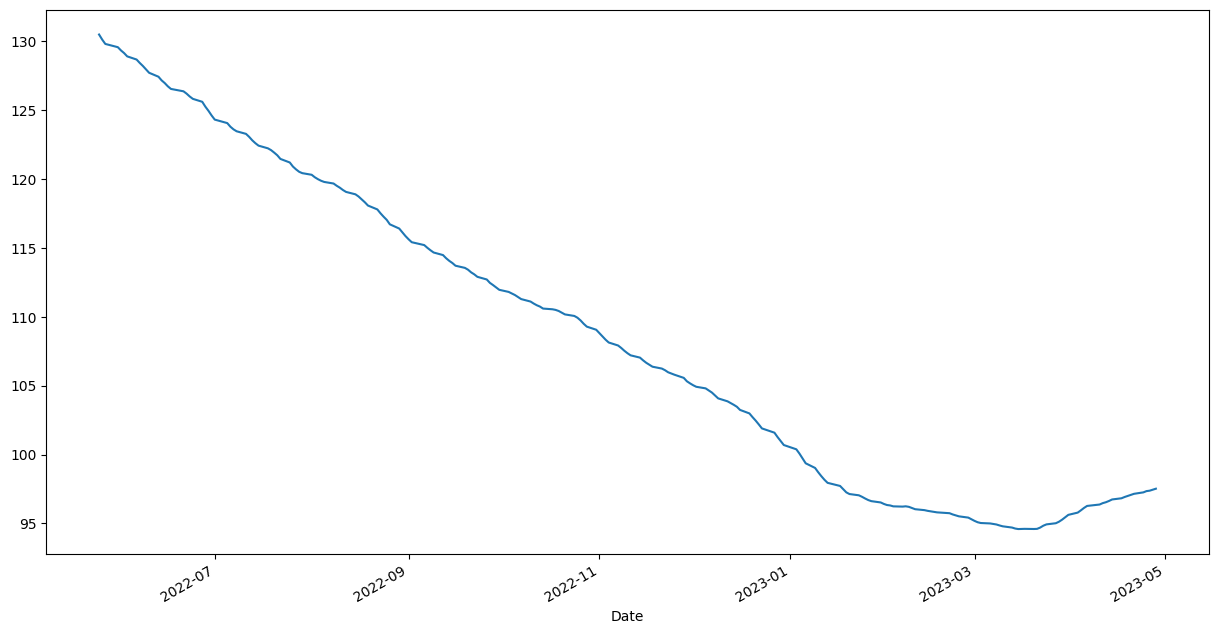

In [ ]:
# prompt: give 100 dats of close rolling price through plots

import matplotlib.pyplot as plt

data['Close'].rolling(100).mean().plot(figsize=(15, 8))
plt.show()


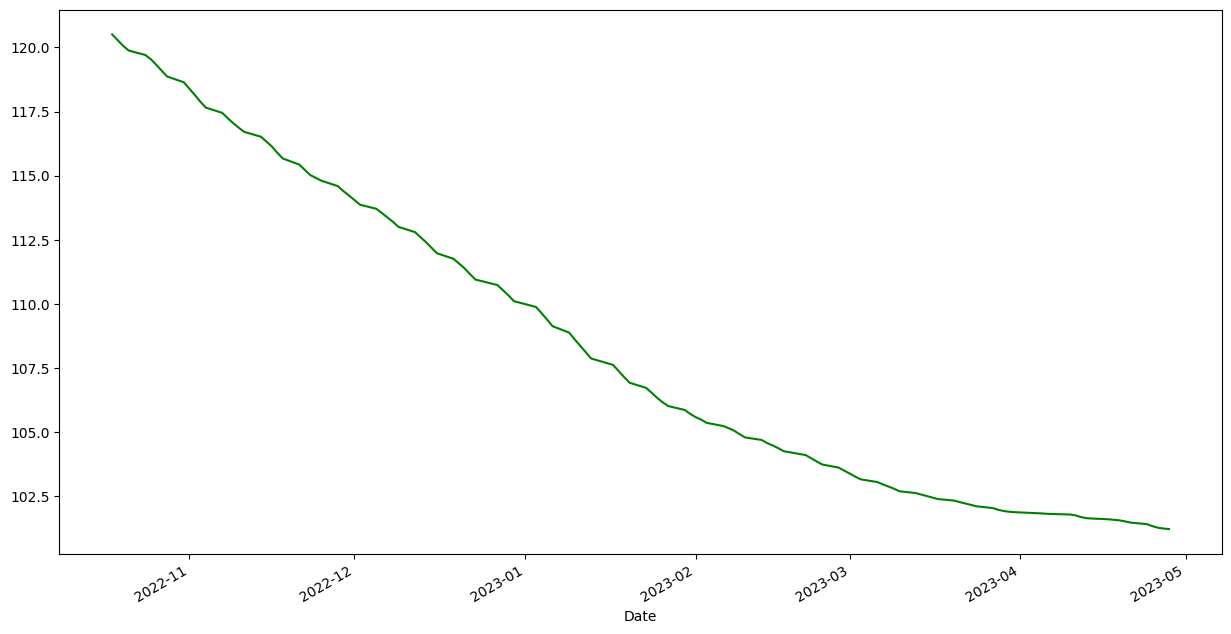

In [ ]:
# prompt: give me 200 days of close rolling price through in green line

import matplotlib.pyplot as plt
data['Close'].rolling(200).mean().plot(figsize=(15, 8), color='green')
plt.show()


In [ ]:
# prompt: if the missing or null values have then drop that

data.dropna(inplace=True)


In [ ]:
get 80%  data to train and 80% to test and spolit it


In [ ]:
# prompt: get 80%  data to train and 80% to test and spolit it

from sklearn.model_selection import train_test_split

X = data.drop('Close', axis=1)
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# prompt: give x and y

print("X:")
print(X)
print("\ny:")
print(y)

X:
                  Open        High         Low   Adj Close    Volume
Date                                                                
2022-01-03  144.475494  145.550003  143.502502  144.909592  25214000
2022-01-04  145.550507  146.610001  143.816147  144.252350  22928000
2022-01-05  144.181000  144.298004  137.523499  137.497040  49642000
2022-01-06  137.497498  139.686005  136.763504  137.394653  29050000
2022-01-07  137.904999  138.254745  135.789001  136.848770  19408000
...                ...         ...         ...         ...       ...
2023-04-24  106.050003  107.320000  105.360001  106.658623  21410900
2023-04-25  106.610001  107.440002  104.559998  104.491096  31408100
2023-04-26  105.559998  107.019997  103.269997  104.331276  37068200
2023-04-27  105.230003  109.150002  104.419998  108.246826  38235200
2023-04-28  107.800003  108.290001  106.040001  108.096992  23957900

[332 rows x 5 columns]

y:
Date
2022-01-03    145.074493
2022-01-04    144.416504
2022-01-05    137

In [ ]:
# prompt: build model to predict target price that is close price

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)


In [ ]:
# prompt: now predict close price of test data

predictions = model.predict(X_test)
print(predictions)


[136.80149377 141.31199166 138.50350177 102.2399986  115.90000356
 126.73549412 112.79900568 109.08100408  97.32999857 119.61399548
 111.87000198 109.91000221  91.66000223 114.03900175 118.12000326
  98.0500018  119.50599367  86.76999894 128.24550329 108.67999715
  94.6600023  110.55000457 109.1499988  114.69999322 101.43000345
 100.77999565 141.45300623 105.91000325  95.83000242  99.8700029
  88.26000433 136.46499052 111.66649299 101.27999955  96.02999807
 100.57000196 143.64250618 143.2500013  105.87000259 117.49999772
 114.13699795 141.64799097 140.01750571 142.64450037 137.1759885
 142.65050314  96.73000476 129.79649135 102.22000211 148.03649405
 114.79250565 101.20999658 108.04000229 101.89999774 133.50650333
 112.25650373  94.16999674 115.0400024  115.06999708 141.06300581
 129.12099503  92.16000629 112.01500307  88.80000084 117.23799629
  91.91000441  98.49999916]


In [ ]:
# prompt: create it in datafram

import pandas as pd

predictions_df = pd.DataFrame(predictions, columns=['Predicted Close'])
print(predictions_df)

    Predicted Close
0        136.801494
1        141.311992
2        138.503502
3        102.239999
4        115.900004
..              ...
62       112.015003
63        88.800001
64       117.237996
65        91.910004
66        98.499999

[67 rows x 1 columns]
